In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from GIST import GIST # Downloaded from https://github.com/imoken1122/GIST-feature-extractor

In [11]:
# Use skimage
from skimage.feature import hog
from skimage.transform import resize

In [15]:
# Dataset Caltech 101
# Source: http://www.vision.caltech.edu/Image_Datasets/Caltech101/Caltech101.html

In [16]:
# Find the name of each class
base_path = "/content/drive/MyDrive/Caltech_101"
class_names = listdir(base_path)
print("Num of classes:", len(class_names))

Num of classes: 6


#Mini-project - Image classification

In [41]:

import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import join
from skimage.io import imread
from skimage.feature import hog
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from GIST import GIST

In [42]:
# Size for images
#nrows = 300
#ncols = 200

nrows = 349
ncols = 352

In [43]:
# == Q1 ==
# Encuentra una manera de cargar 40 imágenes por cada clase del dataset Caltech 101 y almancenarlas en un sólo tensor X.
# Tú decide el tamaño de cada imágen. Asigna una etiqueta (números enteros) a cada clase, y crea el vector Y cuya longitud
# sea igual a X, y en donde cada elemento de Y indique la clase de su correspondiente imagen en X.
# Reporta las longitudes de los arreglo X e Y, el tamaño de las imagénes, y los valores mínimo y máximo de la magnitud de
# los píxeles.

# A1:   Xshape =  (200, 349, 352)
#       Xmin   =  0.0
#       Xmax   =  1.0
#       Yshape =  (200,)
#       Ymin   =  0.0
#       Ymax   =  5.0


In [44]:
# Find the name of each class
base_path = "/content/drive/MyDrive/Caltech_101"
class_names = listdir(base_path)
print("Num of classes:", len(class_names))

# Load first 40 images from each class and label them
X = np.empty(shape=(0, nrows, ncols))
Y = np.empty(shape=(0))
for cl in range(len(class_names)):
    if cl != 1:
        files = [join(base_path, class_names[cl], f) for f in listdir(join(base_path, class_names[cl]))]
        X1 = np.array([resize(imread(f, as_gray='True'), (nrows, ncols)) for f in files[:40]])
        X = np.concatenate((X, X1))
        Y = np.concatenate((Y, cl * np.ones((len(X1)))))

print('Xshape = ', X.shape)
print('Xmin   = ', X.min())
print('Xmax   = ', X.max())
print('Yshape = ', Y.shape)
print('Ymin   = ', Y.min())
print('Ymax   = ', Y.max())


Num of classes: 6
Xshape =  (200, 349, 352)
Xmin   =  0.0
Xmax   =  1.0
Yshape =  (200,)
Ymin   =  0.0
Ymax   =  5.0


In [45]:
# == Q2 ==
# Calcula el descriptor GIST para cada imagen.
# Revisa la documentación de sklearn.neighbors.KNeighborsClassifier. Usa KNeighborsClassifier junto con los descriptores
# GIST para clasificar las imágenes
# Reporta la exactitud de clasificación.

# A2: Exactitud 99.5%

In [46]:
# Compute GIST for each image
# Puede tardar un rato, ya que son muchas imágenes
param = {"orientationsPerScale":np.array([8, 8, 8, 8]),
         "numberBlocks":[4, 4],
         "fc_prefilt":10,
         "boundaryExtension":32}

gist = GIST(param)
X_GIST = np.array([gist._gist_extract(img) for img in X])
print(X_GIST.shape)

(200, 512)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
# Train classifier
kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X_GIST, Y)

# Predict
y_hat = kNN.predict(X_GIST)
acc = kNN.score(X_GIST, Y)
print(f"Accuracy: {acc}")

Accuracy: 0.995


In [48]:
# == Q3 ==
# Usa el modelo grid search evalúa el desempeño de clasificación para:
# numberBlocks de GIST = 4x4, 7x7, 10x10, y
# clasificador kNN con k = 1, 3, 5, 10
# Puede reportar los resultados de exactitud en una tabla de 3 filas con 4 columnas

# A3:
# Num blocks:  4 x  4 --	nn:  1 - acc: 0.99, nn:  3 - acc: 0.86, nn:  5 - acc: 0.84, nn: 10 - acc: 0.83,
# Num blocks:  7 x  7 --	nn:  1 - acc: 0.99, nn:  3 - acc: 0.89, nn:  5 - acc: 0.88, nn: 10 - acc: 0.85,
# Num blocks:  8 x  8 --	nn:  1 - acc: 0.99, nn:  3 - acc: 0.89, nn:  5 - acc: 0.87, nn: 10 - acc: 0.85,

In [49]:
# AUX function to compute GIST with different hyperparameters
def get_GIST(nblocks):
    # Compute GIST for each image
    param = {"orientationsPerScale":np.array([8, 8, 8, 8]), "numberBlocks":[nblocks, nblocks],
             "fc_prefilt":10, "boundaryExtension":32}
    gist = GIST(param)
    X_GIST = np.array([gist._gist_extract(img) for img in X])
    return X_GIST

In [50]:
# Get table from 2 nested loops
for nblocks in [4, 7, 8]: # region 4x4 7x7 y 8x8
    print(f"Num blocks: {nblocks:2d} x {nblocks:2d} --", end='\t')
    X_GIST = get_GIST(nblocks)
    for nn in [1, 3, 5, 10]:
        kNN = KNeighborsClassifier(n_neighbors=nn)
        kNN.fit(X_GIST, Y)
        acc = kNN.score(X_GIST, Y)
        print(f"nn: {nn:2d} - acc: {acc:4.2f}", end=', ')
    print("")

Num blocks:  4 x  4 --	nn:  1 - acc: 0.99, nn:  3 - acc: 0.87, nn:  5 - acc: 0.84, nn: 10 - acc: 0.83, 
Num blocks:  7 x  7 --	nn:  1 - acc: 0.99, nn:  3 - acc: 0.89, nn:  5 - acc: 0.88, nn: 10 - acc: 0.85, 
Num blocks:  8 x  8 --	nn:  1 - acc: 0.99, nn:  3 - acc: 0.89, nn:  5 - acc: 0.87, nn: 10 - acc: 0.85, 


In [51]:
# Classification performance is the same. Keep shortest descriptor as best ones
# Compute GIST only for one image and different number of blocks, just to see which one is the shortest
for nblocks in [4, 7, 8]:
    param = {"orientationsPerScale":np.array([8, 8, 8, 8]),
             "numberBlocks":[nblocks, nblocks],
             "fc_prefilt":10,
             "boundaryExtension":32}
    gist = GIST(param)
    print(f"Num blocks: {nblocks:2d} x {nblocks:2d} -- size = {gist._gist_extract(X[0]).shape}")




Num blocks:  4 x  4 -- size = (512,)
Num blocks:  7 x  7 -- size = (1568,)
Num blocks:  8 x  8 -- size = (2048,)


In [ ]:
# == Q4 ==
# Revisa la documentación sklearn.metrics.confusion_matrix y crea la matriz de confusión para el mejor modelo obtenido
# con la búsqueda de la pregunta anterior.
# Grafica la matriz

In [54]:
# Use nbloks = 4x4 (shortest) and 1NN: Compute GIST, kNN and predict.
param = {"orientationsPerScale":np.array([8, 8, 8, 8]), "numberBlocks":[4, 4], "fc_prefilt":10, "boundaryExtension":32}
gist = GIST(param)
X_GIST = np.array([gist._gist_extract(resize(img, (349, 352))) for img in X])
kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X_GIST, Y)
print(f"Accuracy: {kNN.score(X_GIST, Y)}")
y_hat = kNN.predict(X_GIST)
print(y_hat.shape)

Accuracy: 0.995
(200,)


(5, 5)


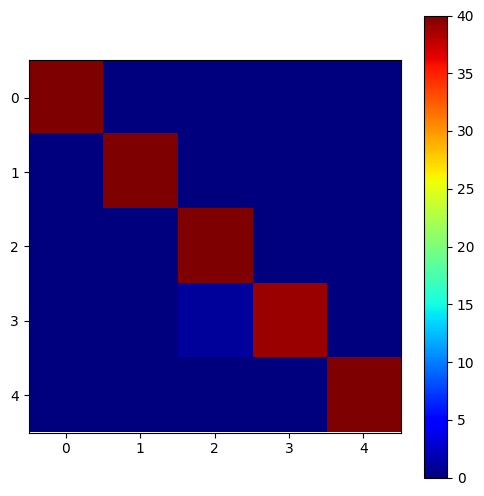

In [53]:

# Confusion matrix
CM = confusion_matrix(Y, y_hat)
print(CM.shape)

plt.figure(figsize=(6, 6))
plt.imshow(CM, cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
# == Q5 ==
# Ahora calcula los descriptores HoG para las imágenes en X (tú decide si las rescalas o no)
# Usando grid search, evalua el impacto sobre la exactitud de clasificación kNN de los siguientes parámetros
# orientations = 4, 9, 16,
# cells_per_block = (1, 1), (2, 2), (3, 3)
# Reporta los resultados en una tabla

# A5:
# 	 	 Cells per block
# Orientations:	 1x1 	 2x2 	 3x3
# 	  4 	0.99	0.99	0.99
# 	  9 	0.99	0.99	0.99
# 	 16 	0.99	0.99	0.99

In [ ]:
# Revisa accuracy con distintos valores de parámetros
print(f"\t \t Cells per block")
print(f"Orientations:\t 1x1 \t 2x2 \t 3x3")
for orient in [4, 9, 16]:
    print(f"\t {orient:2d} \t", end='')
    for cells in [1, 2, 3]:
        X_HOG = np.array([hog(img, orientations=orient, pixels_per_cell=(8, 8), cells_per_block=(cells, cells)) for img in X])
        kNN = KNeighborsClassifier(n_neighbors=1)
        kNN.fit(X_HOG, Y)
        print(f"{kNN.score(X_HOG, Y):4.2f}", end='\t', flush=True)
    print('')

	 	 Cells per block
Orientations:	 1x1 	 2x2 	 3x3
	  4 	0.99	0.99	0.99	
	  9 	0.99	0.99	0.99	
	 16 	0.99	0.99	0.99	


In [ ]:
# == Q6 ==
# ¿El cambio en el valor de los parámetros evaluados en la pregunta anterior tiene algún impacto en la longitud del
# descriptor? ¿Por qué?

# Sí. Como indica la tabla anterior, ambos parámetros influyen en el tamaño del descriptor.
# El número de orientaciones indica el número de bins en el histograma de cada celda. Entre mayor sea, más largo es el descriptor.
# Y el número de celdas por bloque, indica cuantos histogramas se concatenan juntos. Entre mayor sea, más largo es el descriptor.

In [ ]:
# Revisa tamaño con una sola imagen: process just 1 image
print(f"\t \t Cells per block")
print(f"Orientations:\t 1x1 \t 2x2 \t 3x3")
for orient in [4, 9, 16]:
    print(f"\t {orient:2d} \t", end='')
    for cells in [1, 2, 3]:
        h = hog(X[0], orientations=orient, pixels_per_cell=(8, 8), cells_per_block=(cells, cells))
        print(f"{h.shape}", end='\t', flush=True)
    print('')

	 	 Cells per block
Orientations:	 1x1 	 2x2 	 3x3
	  4 	(7568,)	(28896,)	(61992,)	
	  9 	(17028,)	(65016,)	(139482,)	
	 16 	(30272,)	(115584,)	(247968,)	


In [ ]:
# == Q7 ==
# Muestra la matriz de confusión para la mejor combinación de parámetros de HoG

Accuracy: 0.995
(200,)
(5, 5)


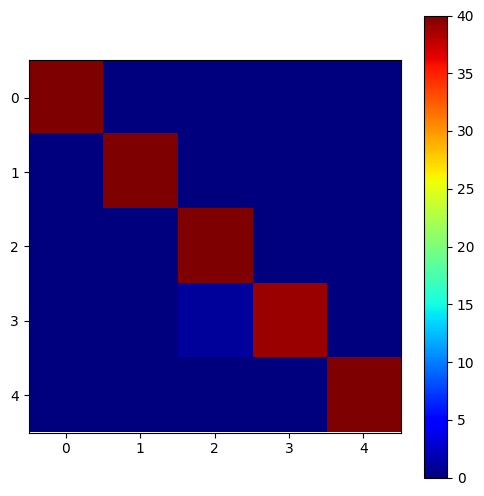

In [ ]:
# Igual podemos elegir la más corta
X_HOG = np.array([hog(img, orientations=4, pixels_per_cell=(8, 8), cells_per_block=(1, 1)) for img in X])
kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X_HOG, Y)
print(f"Accuracy: {kNN.score(X_HOG, Y)}")
y_hat = kNN.predict(X_HOG)
print(y_hat.shape)

# Confusion matrix
CM = confusion_matrix(Y, y_hat)
print(CM.shape)

plt.figure(figsize=(6, 6))
plt.imshow(CM, cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
# == Q8 ==
# Según la evaluación anterior, ¿qué descriptor parece ser más adecuado para esta base de datos, GIST o HoG?
# ¿Por qué crees que sea así?
# Ambos son capaces de obtener exactitud de clasificación = 1.
# Sin embargo, si comparamos la longitud de los vectores, podrímos pensar que GIST tiene mejor desemepeño.

In [ ]:
# Some useful links
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# Some extra refs for more datasets:
# https://analyticsindiamag.com/10-open-datasets-you-can-use-for-computer-vision-projects/
# http://www.cvpapers.com/datasets.html

# Part 2: SIFT computation for a set of images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Define a base directory
BASEPATH = '/content/drive/MyDrive/Caltech_101'

In [ ]:
# Count the number of images in each class of the Caltech101 dataset
import os

class_names = os.listdir(BASEPATH)
class_names.sort()
class_freqs = np.array([len(os.listdir(os.path.join(BASEPATH, class_id))) for class_id in class_names])

class_names = class_names[1:6]
class_freqs = class_freqs[1:6]

print(f"{len(class_names)} classes found.")
print(class_names)
print(class_freqs)

5 classes found.
['accordion', 'airplanes', 'anchor', 'ant', 'brontosaurus']
[40 40 41 40 40]


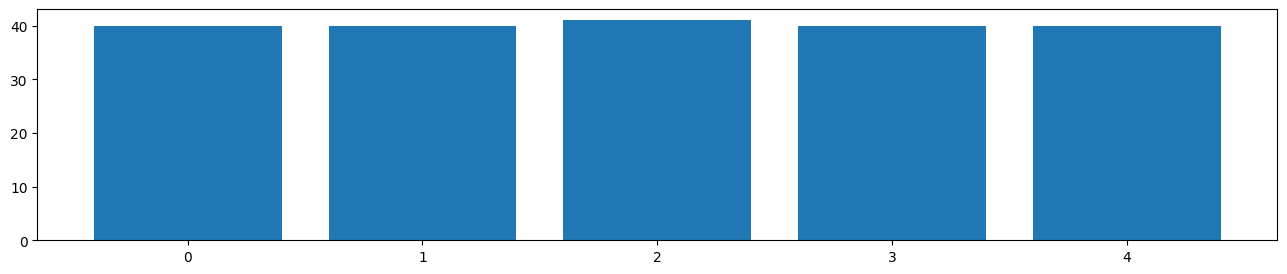

In [ ]:
# Plot a histogram
plt.figure(figsize=(16, 3))
plt.bar(range(len(class_freqs)), class_freqs)
plt.show()

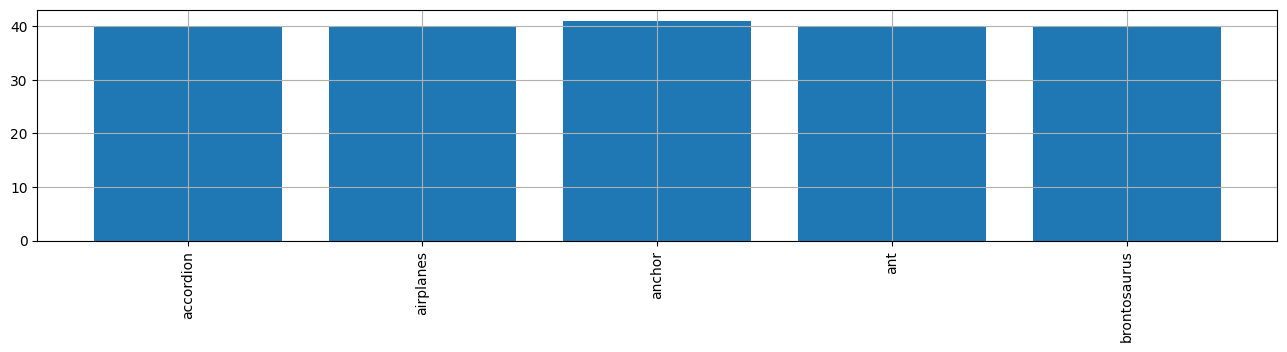

In [ ]:
# Remove classes with more than 60 instances
from itertools import compress
to_Keep = class_freqs <= 60
class_names = list(compress(class_names, to_Keep))
class_freqs = class_freqs[to_Keep]

plt.figure(figsize=(16, 3))
plt.bar(range(len(class_freqs)), class_freqs)
plt.xticks(range(len(class_freqs)), class_names, rotation='vertical')
plt.grid()
plt.show()

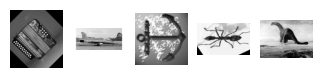

In [ ]:
# Show one example per class
plt.figure(figsize=(20, 10))
for it_class, class_id in enumerate(class_names):
    class_files = os.listdir(os.path.join(BASEPATH, class_id))
    img = cv2.imread(os.path.join(BASEPATH, class_id, class_files[0]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.subplot(5, 25, it_class+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Get the full path for all files
all_files_names = []
all_files_classes = []
for it_class, class_id in enumerate(class_names):
    class_files = os.listdir(os.path.join(BASEPATH, class_id))
    for file_name in class_files:
        all_files_names.append(os.path.join(BASEPATH, class_id, file_name))
        all_files_classes.append(it_class)
all_files_classes = np.array(all_files_classes)

In [ ]:
# Split training and test sets
from sklearn.model_selection import train_test_split
names_train, names_test, y_train, y_test = train_test_split(all_files_names, all_files_classes, test_size=0.2)

In [ ]:
from sklearn.preprocessing import normalize
file_path = names_train[0]
img = cv2.imread(file_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
_, desc = sift.detectAndCompute(gray, None)
desc = np.clip(normalize(desc), 0.0, 0.2)
desc = normalize(desc)

In [ ]:
# Define a function that loads an image and computes its SIFT descriptors
from sklearn.preprocessing import normalize

def compute_SIFT(file_path):
    img = cv2.imread(file_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    _, desc = sift.detectAndCompute(gray, None)
    desc = np.clip(normalize(desc), 0.0, 0.2)
    return(normalize(desc))

In [ ]:
# Compute up to 20,000 SIFT descriptors from training images to use them for dictionary training
from random import sample

train_SIFTS = []
for file_name in sample(names_train, len(names_train)): # Use random subset of training samples
    train_SIFTS.extend(compute_SIFT(file_name))
    if len(train_SIFTS) >= 20_000:
        break

train_SIFTS = np.array(train_SIFTS)

Inertia: 5089.859375


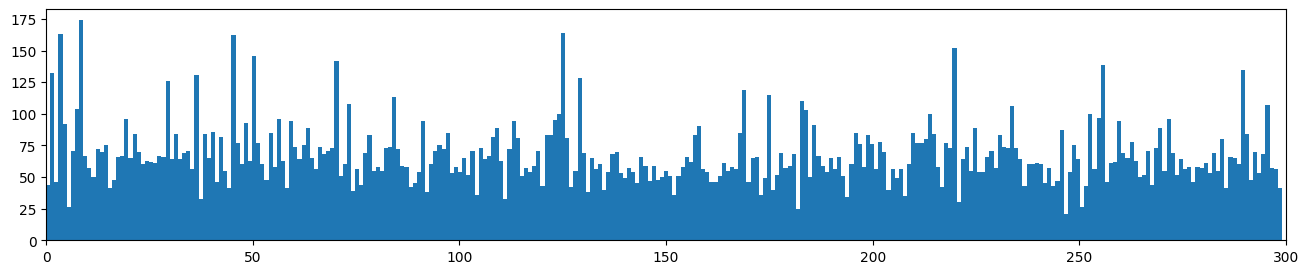

In [ ]:
# Train a visual dictionary
from sklearn.cluster import KMeans

num_clusters = 300
kmeans = KMeans(n_clusters=num_clusters, n_init=10).fit(train_SIFTS)
print(f"Inertia: {kmeans.inertia_}")

# Show frequency distribution of words
plt.figure(figsize=(16, 3))
plt.hist(kmeans.labels_, num_clusters)
plt.xlim(0, num_clusters)
plt.show()

In [ ]:
# Read an image, estimate its SIFT descriptors and BoW representation
def get_visual_words(file_path):
    SIFTS = compute_SIFT(file_path)
    v_words = kmeans.predict(SIFTS)
    return(v_words)

In [ ]:
# Compute the BOW representation for all the training set
BOW_train = np.zeros((len(names_train), num_clusters))
bins = np.arange(0, num_clusters+1)
for it_file, file_name in enumerate(names_train):
    v_words = get_visual_words(file_name)
    BOW_train[it_file], _ = np.histogram(v_words, bins, density=True)

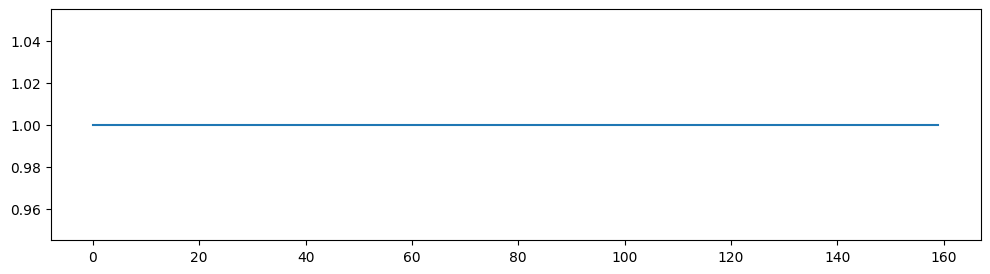

(160, 300)
(160,)


In [ ]:
# Show all BOW representations sum up to one
plt.figure(figsize=(12, 3))
plt.plot(BOW_train.sum(axis=1))
plt.show()

print(BOW_train.shape)
print(y_train.shape)

In [ ]:
# Compute the BOW representation for all the test set
BOW_test = np.zeros((len(names_test), num_clusters))
bins = np.arange(0, num_clusters+1)
for it_file, file_name in enumerate(names_test):
    v_words = get_visual_words(file_name)
    BOW_test[it_file], _ = np.histogram(v_words, bins, density=True)

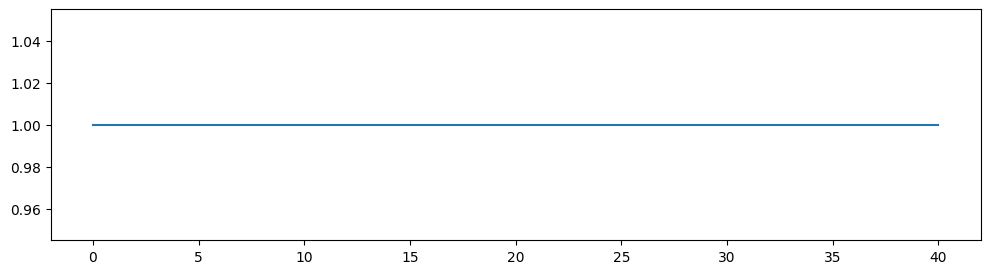

(41, 300)
(41,)


In [ ]:
# Show all BOW representations sum up to one
plt.figure(figsize=(12, 3))
plt.plot(BOW_test.sum(axis=1))
plt.show()

print(BOW_test.shape)
print(y_test.shape)

In [ ]:
# Imports for training a linear SVC with grid search
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define grid search parameters
hyperparams = {'kernel': ['linear', 'poly', 'rbf'],
               'C': [0.01, 0.1, 1.0, 10, 100],
               'degree': [1, 2, 3, 4],
               'gamma': ['auto', 'scale'],
               'coef0': [1/4, 1/2, 1, 2]}
hyperparams

{'kernel': ['linear', 'poly', 'rbf'],
 'C': [0.01, 0.1, 1.0, 10, 100],
 'degree': [1, 2, 3, 4],
 'gamma': ['auto', 'scale'],
 'coef0': [0.25, 0.5, 1, 2]}

In [ ]:
# Create and train the classifiers with grid search
gs = GridSearchCV(SVC(), hyperparams, verbose=True, n_jobs=-1)
gs.fit(BOW_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'coef0': [0.25, 0.5, 1, 2], 'degree': [1, 2, 3, 4],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=True)

In [ ]:
# Print info about best score and best hyperparameters
print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.719
Best params: {'C': 1.0, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
# Evaluate on the test set
best_svm = gs.best_estimator_

print(f"Train mean accuracy: {best_svm.score(BOW_train, y_train):.3f}")
print(f"Test mean accuracy: {best_svm.score(BOW_test, y_test):.3f}")

Train mean accuracy: 0.994
Test mean accuracy: 0.805


In [ ]:
#               Train Acc       Val Acc         Test Acc.       Tiempo de entrenamiento
# GIST           99.5%
# HoG            99.5%
# SIFT+          99.4%

# hay 160 bolsa de palabras para el modelo BoW

(5, 5)


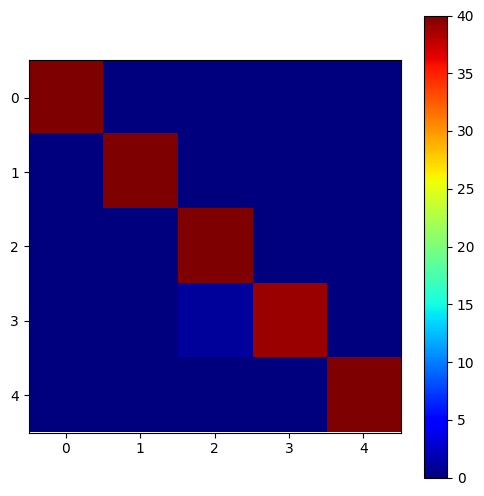

In [55]:
# Confusion matrix
CM = confusion_matrix(Y, y_hat)
print(CM.shape)

plt.figure(figsize=(6, 6))
plt.imshow(CM, cmap='jet')
plt.colorbar()
plt.show()